Metadata visualization to get an overview of our data and it's content

In [4]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

Data = 'Data'

In [5]:
Data = 'Data'
data_raw = 'Data/raw'

In [6]:
df_meta_ITS = pd.read_csv('Data/20250913_metadata_ITS.tsv', sep='\t')
df_meta_ITS.head()

,sample ID,label_barcode1,label_barcode2,created_date,amplicon,unique_id,sample_id,person-id,plate,plate_position,amplicon_conc,DNA_extraction_plate,project,project_2,sample_type,day,hand
0,366291_386-LP4-ITS-0386,GGAAGTGAAGTT,ATTTGCTTTGCC,16.10.2024 14:59,ITS,LP4-ITS-0386,1820-d21-1,1820.0,P5,B01,6.7035,DNA59,highschool,highschool,sourdough,21.0,NaN
1,366291_387-LP4-ITS-0387,GATCGGGTCGGA,GTGACCCTGTCA,16.10.2024 14:59,ITS,LP4-ITS-0387,1725-d7-1,1725.0,P5,C01,7.8515,DNA59,highschool,highschool,sourdough,7.0,NaN
2,366291_388-LP4-ITS-0388,GTGACCTGATGT,GAGAATGGAAAG,16.10.2024 14:59,ITS,LP4-ITS-0388,1806-d14-1,1806.0,P5,D01,10.1119,DNA59,highschool,highschool,sourdough,14.0,NaN
3,366291_389-LP4-ITS-0389,GCCTACCGCCTA,CAGTAGCGATAT,16.10.2024 14:59,ITS,LP4-ITS-0389,1723-d21-1,1723.0,P5,E01,5.0523,DNA59,highschool,highschool,sourdough,21.0,NaN
4,366291_390-LP4-ITS-0390,ATACGGGCGCAT,GCCAAGGATAGG,16.10.2024 14:59,ITS,LP4-ITS-0390,1706-d7-1,1706.0,P5,F01,6.1151,DNA59,highschool,highschool,sourdough,7.0,NaN


In [7]:
df_meta_details = pd.read_csv('Data/20250914_metadata_personal_environmental_sensory_details.tsv', sep='\t')
df_meta_details.head()

,sample-id,start_time,completion_time,background,ethical_agreement,sd_bake_experience,sd_bake_last_time,yeast_bake_experience,yeast_bake_last_time,sd_stor_loc,...,animal_score_D28,chemical_score_D28,body_odour_score_D28,fruity_score_D28,maillard_score_D28,sour_score_D28,ocean_score_D28,earthy_score_D28,fermented_dairy_score_D28,nutty_score_D28
0,1701,6.18.24 23:34:47,6.18.24 23:37:55,sterile,I agree.,no,NaN,yes,4.18.2024,kitchen counter,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1702,6.18.24 23:37:40,6.18.24 23:42:32,sterile,I agree.,no,NaN,yes,05.01.2023,cupboard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1703,6.18.24 15:24:39,6.18.24 15:28:40,sterile,I agree.,no,NaN,yes,NaN,kitchen counter,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
3,1704,6.24.24 21:14:24,6.24.24 21:16:48,sterile,I agree.,no,NaN,no,NaN,kitchen counter,...,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1705,6.24.24 21:41:15,6.24.24 21:46:29,sterile,I agree.,no,NaN,yes,2.19.2024,kitchen counter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
!qiime feature-table tabulate-seqs \
  --i-data Data/raw/filtered-dada1-rep-seqs-highschool.qza \
  --o-visualization Data/processed/filtered-dada1-rep-seqs-highschool.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Usage: qiime feature-table tabulate-seqs [OPTIONS]

  Generate tabular view of feature identifier to sequence mapping, including
  links to BLAST each sequence against the NCBI nt database.

Inputs:
  --i-data ARTIFACT FeatureData[Sequence | AlignedSequence]
                         The feature sequences to be tabulated.     [required]
  --i-taxonomy ARTIFACTS... Collection[FeatureData[Taxonomy]]
                         The taxonomic classifications of the tabulated
                         features.                                  [optional]
Parameters:
  --m-metadata-file METADATA...
    (multiple            Any additional metadata for the tabulated features.


In [10]:
Visualization.load(f"{Data}/filtered-dada1-rep-seqs-highschool.qzv")

<visualization: Visualization uuid: 47d42ee6-4aa9-4ea7-bbd3-3fb6ffa54e68>

### 2. Time change of pH and TTA ###

In [6]:
ITS = pd.read_csv(f"{data_raw}/merged_output.tsv", sep='\t', index_col='sample ID')
ITS.head()

,label_barcode1,label_barcode2,created_date,amplicon,unique_id,sample_id,person-id,plate,plate_position,amplicon_conc,...,animal_score_D28,chemical_score_D28,body_odour_score_D28,fruity_score_D28,maillard_score_D28,sour_score_D28,ocean_score_D28,earthy_score_D28,fermented_dairy_score_D28,nutty_score_D28
sample ID,,,,,,,,,,,,,,,,,,,,,
366291_386-LP4-ITS-0386,GGAAGTGAAGTT,ATTTGCTTTGCC,16.10.2024 14:59,ITS,LP4-ITS-0386,1820-d21-1,1820.0,P5,B01,6.7035,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
366291_387-LP4-ITS-0387,GATCGGGTCGGA,GTGACCCTGTCA,16.10.2024 14:59,ITS,LP4-ITS-0387,1725-d7-1,1725.0,P5,C01,7.8515,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
366291_388-LP4-ITS-0388,GTGACCTGATGT,GAGAATGGAAAG,16.10.2024 14:59,ITS,LP4-ITS-0388,1806-d14-1,1806.0,P5,D01,10.1119,...,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
366291_389-LP4-ITS-0389,GCCTACCGCCTA,CAGTAGCGATAT,16.10.2024 14:59,ITS,LP4-ITS-0389,1723-d21-1,1723.0,P5,E01,5.0523,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
366291_390-LP4-ITS-0390,ATACGGGCGCAT,GCCAAGGATAGG,16.10.2024 14:59,ITS,LP4-ITS-0390,1706-d7-1,1706.0,P5,F01,6.1151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2.1.1) Time change of pH - measured in laboratory**

In [78]:
pH_cols = [col for col in ITS.columns if 'pH' in col and 'home' not in col]
ITS_pH = ITS[pH_cols]
pH_clean = ITS_pH.dropna()
pH_clean

,day7_pH,day14_pH,day21_pH,dayx_pH_D28
sample ID,,,,
366291_386-LP4-ITS-0386,3.69,3.82,3.91,3.75
366291_387-LP4-ITS-0387,3.84,3.88,3.77,3.74
366291_388-LP4-ITS-0388,3.75,3.71,3.61,3.73
366291_389-LP4-ITS-0389,3.72,3.93,4.03,3.86
366291_391-LP4-ITS-0391,3.64,3.80,3.88,3.76
...,...,...,...,...
366291_340-LP4-ITS-0340,3.69,3.73,3.80,3.75
366291_343-LP4-ITS-0343,3.69,3.82,3.91,3.75
366291_344-LP4-ITS-0344,3.69,3.82,3.91,3.75


In [79]:
pH_means = pH_clean.mean(axis=0)
pH_std = pH_clean.std(axis=0)
pH_means
pH_std

day7_pH        0.107072
day14_pH       0.103816
day21_pH       0.144693
dayx_pH_D28    0.067531
dtype: float64

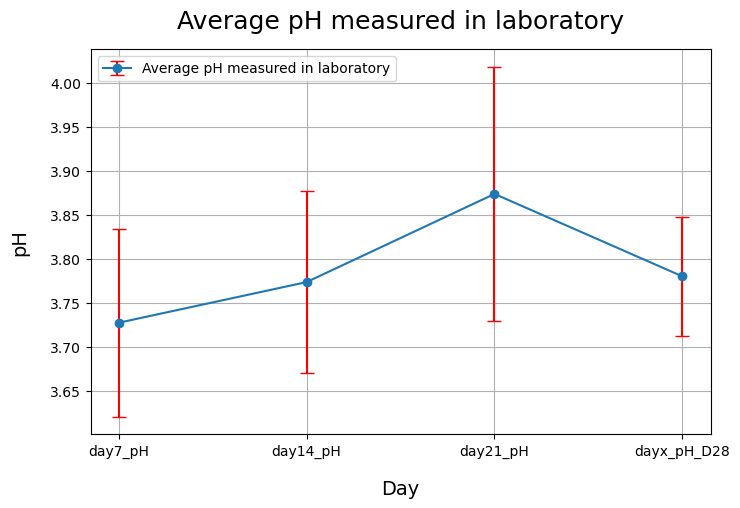

In [80]:
plt.figure(figsize=(8,5))
plt.errorbar(x=pH_means.index, y=pH_means.values, 
             yerr=pH_std.values,  
             fmt='o-',  
             capsize=5, 
             ecolor='red',  
             label='Average pH measured in laboratory')

plt.xlabel('Day', fontsize=14, labelpad=15)
plt.ylabel('pH', fontsize=14, labelpad=15)
plt.title('Average pH measured in laboratory', fontsize=18, pad=15)
plt.grid(True)
plt.legend()
plt.show()

**2.1.2) Time change of pH - measured at homes**

In [72]:
pH_cols_home = [col for col in ITS.columns if 'pH_home' in col]
ITS_pH_home = ITS[pH_cols_home]
pH_home = ITS_pH_home.dropna()
pH_home

,day7_pH_home,day14_pH_home,day21_pH_home
sample ID,,,
366291_386-LP4-ITS-0386,4.4,4.6,4.4
366291_387-LP4-ITS-0387,4.4,4.4,4.4
366291_388-LP4-ITS-0388,4.7,4.1,4.4
366291_392-LP4-ITS-0392,4.4,4.6,4.5
366291_399-LP4-ITS-0399,4.1,4.3,4.4
...,...,...,...
366291_340-LP4-ITS-0340,4.4,4.6,4.5
366291_343-LP4-ITS-0343,4.4,4.6,4.4
366291_344-LP4-ITS-0344,4.4,4.6,4.4


In [81]:
pH_means_home = pH_home.mean(axis=0)
pH_std_home = pH_home.std(axis=0)
pH_means_home, pH_std_home

(day7_pH_home     4.352284
 day14_pH_home    4.363959
 day21_pH_home    4.346701
 dtype: float64,
 day7_pH_home     0.173668
 day14_pH_home    0.176908
 day21_pH_home    0.233325
 dtype: float64)

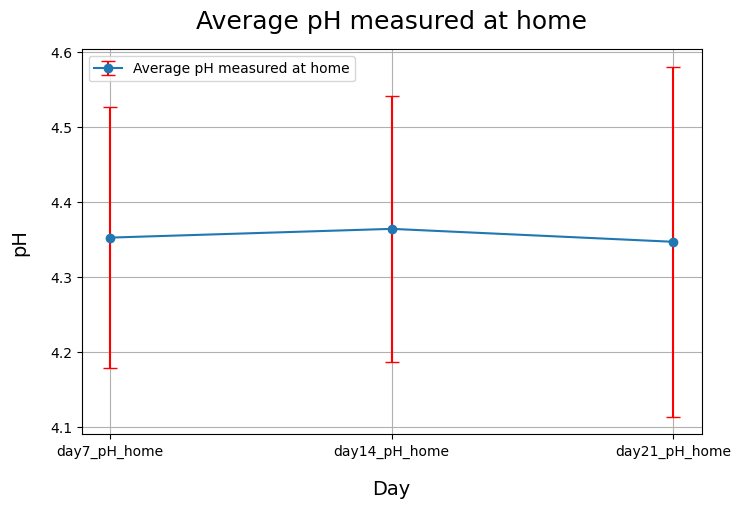

In [82]:
plt.figure(figsize=(8,5))
plt.errorbar(x=pH_means_home.index, y=pH_means_home.values, 
             yerr=pH_std_home.values,  
             fmt='o-',  
             capsize=5, 
             ecolor='red',  
             label='Average pH measured at home')

plt.xlabel('Day', fontsize=14, labelpad=15)
plt.ylabel('pH', fontsize=14, labelpad=15)
plt.title('Average pH measured at home', fontsize=18, pad=15)
plt.grid(True)
plt.legend()
plt.show()

**2.2) Time change of TTA**

In [63]:
TTA_cols = [col for col in ITS.columns if 'TTA' in col]
ITS_TTA_noNAN = ITS_TTA.dropna()
ITS_TTA_noNAN

,day7_TTA,day14_TTA,day21_TTA
sample ID,,,
366291_386-LP4-ITS-0386,14.08,11.75,11.80
366291_387-LP4-ITS-0387,8.06,13.49,17.02
366291_388-LP4-ITS-0388,15.16,15.80,18.70
366291_389-LP4-ITS-0389,10.22,15.57,11.51
366291_391-LP4-ITS-0391,13.44,16.10,12.18
...,...,...,...
366291_340-LP4-ITS-0340,16.15,15.48,16.00
366291_343-LP4-ITS-0343,14.08,11.75,11.80
366291_344-LP4-ITS-0344,14.08,11.75,11.80


In [64]:
row_means = ITS_TTA_noNAN.mean(axis=0)
row_std = ITS_TTA_noNAN.std(axis=0)

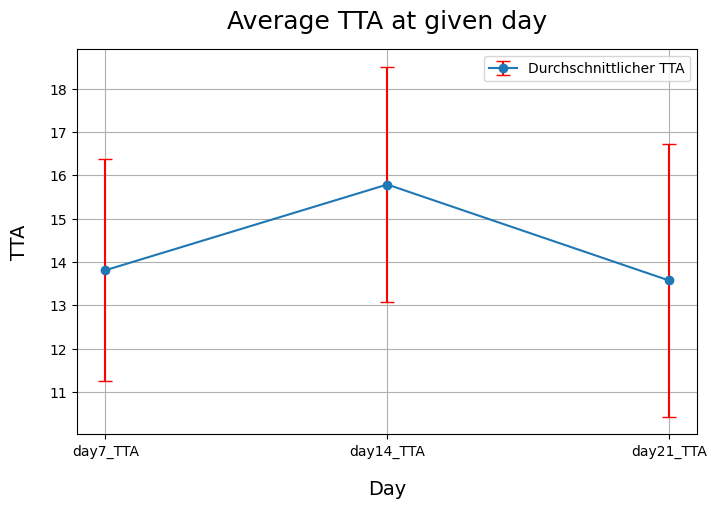

In [65]:
plt.figure(figsize=(8,5))
plt.errorbar(x=row_means.index, y=row_means.values, 
             yerr=row_std.values,  
             fmt='o-',  
             capsize=5,  
             ecolor='red',  
             label='Durchschnittlicher TTA')

plt.xlabel('Day', fontsize=14, labelpad=15)
plt.ylabel('TTA', fontsize=14, labelpad=15)
plt.title('Average TTA at given day', fontsize=18, pad=15)
plt.grid(True)
plt.legend()
plt.show()